# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

## **This notebook demonstrates a simple example of differential gene inference using scNET gene embeddings.**

**Install scnet using pip**

**It may be necessary to restart (not delete) the runtime after installing scENT in Google Colab. We are working on fixing this issue in future releases.**

In [1]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

**Download example data**

In [1]:
import gdown
download_url = f'https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi'
output_path = './example.h5ad'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi
From (redirected): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi&confirm=t&uuid=49008c0c-bb27-4bd7-93c8-3105b9118048
To: /content/example.h5ad
100%|██████████| 1.38G/1.38G [00:12<00:00, 115MB/s]


'./example.h5ad'

### Import scNET and model traning

In [2]:
import scNET
#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

#For GPU with 24GB memory
scNET.main.MAX_CELLS_BATCH_SIZE = 3000

#for GPU with 40GB memory
scNET.main.MAX_CELLS_BATCH_SIZE = 4000

#For GPU with 80GB memory or more
scNET.main.MAX_CELLS_BATCH_SIZE = 8000

#otherwize, do not change the default value

When embedding a single cell type, it is recommended to increase the expression cutoff.

In [3]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.1

In [4]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 3

In [5]:
#To control the number of deifferentially expressed genes, the default value is 2000
#For example, to consider 2500 DE genes
scNET.main.DE_GENES_NUM = 2500



### **Separate embeddings for CD8 and CD4 T cells.**

In [6]:
import scanpy as sc

obj = sc.read_h5ad("./example.h5ad")
cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
sub_obj = obj[obj.obs["Cell Type"] == "CD4 Tcells"]

scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=250, model_name = "CD4")
embedded_genes_cd4, _, node_features_cd4 ,_ =  scNET.load_embeddings("CD4")


/usr/local/lib/python3.11/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (4411, 549)


Training: 100%|██████████| 250/250 [09:10<00:00,  2.20s/it]

Best Network AUC: 0.8787243155588965


In [7]:
sub_obj = obj[obj.obs["Cell Type"] == "CD8 Tcells"]

scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=250, model_name = "CD8")
embedded_genes_cd8, _, node_features_cd8 , _ =  scNET.load_embeddings("CD8")

/usr/local/lib/python3.11/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (3875, 906)


Training: 100%|██████████| 250/250 [11:01<00:00,  2.65s/it]

Best Network AUC: 0.8862778873873289


### **Let's examine the difference in ICOS embeddings between CD4 and CD8 subsets.**

**First, calculate the co-embedding of each embedding.**

In [8]:
import numpy as np
import pandas as pd
co_embed_cd8 = np.corrcoef(embedded_genes_cd8)
co_embed_cd8 = pd.DataFrame(co_embed_cd8, index=node_features_cd8.index, columns=node_features_cd8.index)

co_embed_cd4 = np.corrcoef(embedded_genes_cd4)
co_embed_cd4 = pd.DataFrame(co_embed_cd4, index=node_features_cd4.index, columns=node_features_cd4.index)

inter = co_embed_cd4.columns.intersection(co_embed_cd8.columns)
co_embed_cd4 = co_embed_cd4.loc[inter,inter]
co_embed_cd8 = co_embed_cd8.loc[inter,inter]

**We can run Gene Set Enrichment on the difference in co-embedding between the subsets.**

In [9]:
import gseapy as gp
de_co_embed = co_embed_cd4 - co_embed_cd8
rank_vector = de_co_embed["Icos"].sort_values(ascending=False)
rank_vector.index = rank_vector.index.str.upper()
pre_res = gp.prerank(
    rnk=de_co_embed["Icos"].sort_values(ascending=False),
    gene_sets='GO_Biological_Process_2021',
    outdir='gsea_output',
    permutation_num=1000,
    seed=42,
)

**Finally, visualize the results.**

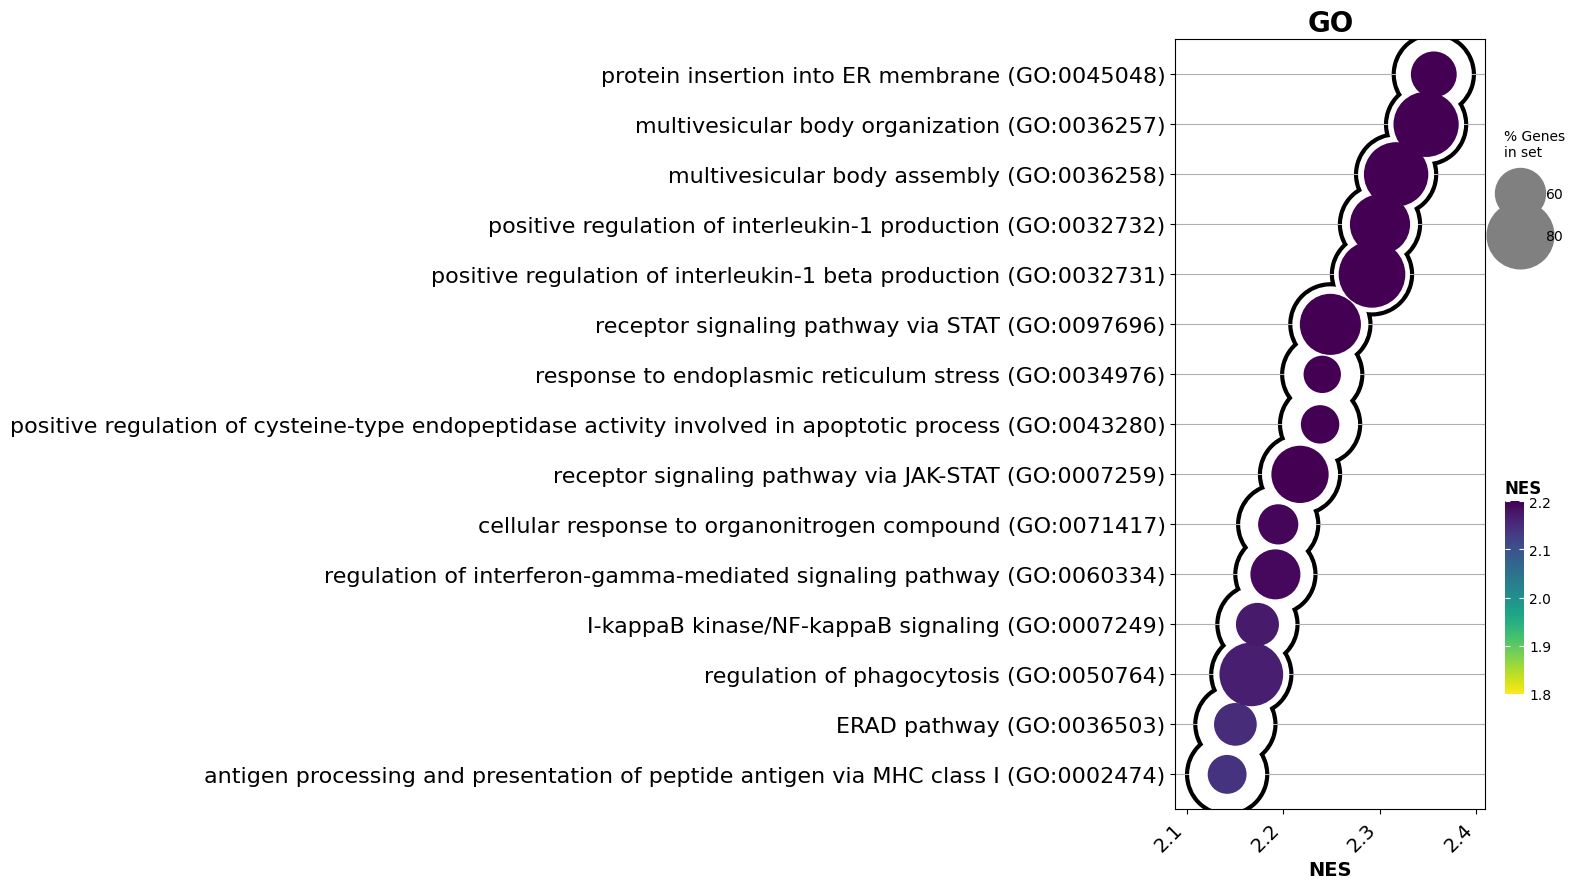

In [10]:
from gseapy import barplot, dotplot

results_df = pre_res.res2d  # DataFrame with enrichment results
ax = dotplot(pre_res.res2d,
              column="NES",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=15,
              figsize=(5,10),
              title = "GO",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )